# stryke

Individual Based Monte Carlo model simulating fish entrainment through a hydroelectric facility. For information on setting up a project spreadsheet, please refer to the ReadMe [Readme](https://github.com/knebiolo/stryke/blob/master/README.md).  This project notebook will guide the end user through the analytical phases of an entrainment impact assessment.  If you're in JupyterLab, use the table of contents for navigation.

# Connect to software
The first step is to connect this notebook to stryke, which can be found in the directory you previously cloned from GitHub.  

In [1]:
directory = r"C:\Users\knebiolo\OneDrive - Kleinschmidt Associates, Inc\Software\stryke\Stryke"

import sys
sys.path.append(directory)

now that we have connected to stryke, let's import it and set up the remaining notebook environment.

In [4]:
import stryke
%matplotlib inline

# Fit Entrainment Rates
If you do not have existing empirical data for your facility of interest, stryke can query the EPRI entrainment database and develop them for you.  To fit a distribution, simply pass a list of arguments to stryke. The list of arguments, their datatype, and explanations are below.  The following example queries the EPRI database to return a sample of entrainment observations of Catastomidae in the winter within the great lakes watershed while leaving out Potato Rapids from the sample: 

'Family = 'Catostomidae', Month = [1,2,12], HUC02= [4], NIDID= 'WI00757''

| Parameter       | Data Type |                                             Comment                                           |
|-----------------|-----------|-----------------------------------------------------------------------------------------------|
|states           |String     |(not required) State abbreviations to filter the dat                                           |
|plant_cap        |String     |(not required) Plant capacity (cfs) with a direction for filtering (> or <=)                   |
|Family, Genus, Species|String     |(at least one required) taxonomic classifications                                         |
|HUC02, HUC04, HUC06, HUC08|String      |(not required) Hydrologic Unit Codes for geographic filtering, leading zeros required|
|NIDID         |String      |(not required) National Inventory of Dams identifier - used to filter out a facility              |
|River             |String     |(not required) River name for filtering                                                 |

When the next cell is run, stryke will return a figure with four histograms that depict natural logarithm transformed entrainment rates (one observed, three simulated).  Stryke fits a Log Normal, Weibull, and Pareto distribution to the returned data and produces a p-value from a Kolmogorov-Smirnof test, where H0 = no difference between observed and simulated histogram.  The distribution with the largest p-value  best describes trends in observed data. The query above produced the figure below.  In this instance, the Log Normal had the highest p-value and is most like the observed data.  For most queries, the Log Normal will be the best distribution.  The Weibull works when there are fewer observations with low rates, and the Pareto only works in special cases when observations are monotonically decreasing after log transforming them. 

<img src="https://github.com/knebiolo/stryke/assets/61742537/1b57783c-0913-40d9-913a-4f45ee2ab8a0" width="400" height="auto"/>



--------------------------------------------------------------------------------------------
out of 112 potential samples 33 had this species present for 0.2946 probability of presence
--------------------------------------------------------------------------------------------
There are 33 records left to describe entrainment rates
The maximum entrainment rate for this fish is: 2.356252858
--------------------------------------------------------------------------------------------
The Pareto distribution has a shape parameter of b: 0.3959,  location: 0 and scale: 0.0045
The Pareto mean is: inf
The Pareto variance is: inf
The Pareto standard deviation is: inf
--------------------------------------------------------------------------------------------
The Log Normal distribution has a shape parameter of b: 1.6918,  location: 0 and scale: 0.0562
The Log Normal mean is: 0.23490349935329435
The Log Normal variance is: 0.910419573637075
The Log Normal standard deviation is: 0.954159092414401

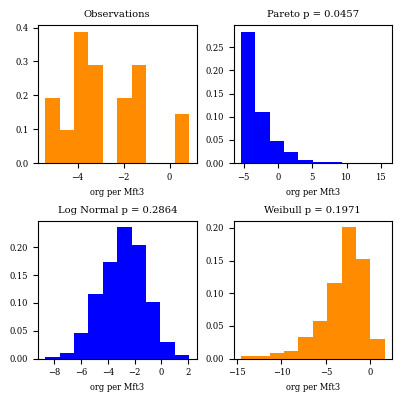

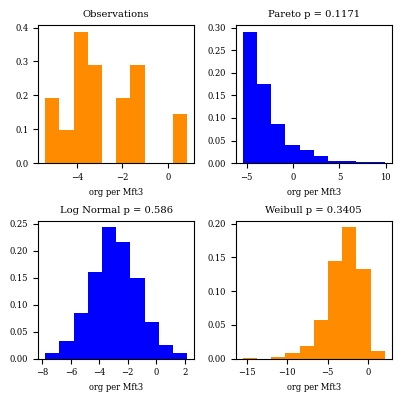

The log normal distribution has a shape parameter s: 0.1916, location: -22.1623 and scale: 36.302


In [5]:
#%% Pass EPRI filter, fit distributions
fish = stryke.epri(Family = 'Catostomidae', Month = [1,2,12], HUC02= [4], NIDID= 'WI00757')
fish.ParetoFit()
fish.LogNormalFit()
fish.WeibullMinFit()
fish.plot()
fish.LengthSummary()